In [1]:
bucket = 'mx-sagemaker-mau'
prefix = 'sagemaker/DEMO-xgboost-dm'
 
# Define IAM role
import boto3
import re
from sagemaker import get_execution_role

role = get_execution_role()

In [2]:
import numpy as np                                # For matrix operations and numerical processing
import pandas as pd                               # For munging tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display               # For displaying outputs in the notebook
from time import gmtime, strftime                 # For labeling SageMaker models, endpoints, etc.
import sys                                        # For writing outputs to notebook
import math                                       # For ceiling function
import json                                       # For parsing hosting outputs
import os                                         # For manipulating filepath names
import sagemaker                                  # Amazon SageMaker's Python SDK provides many helper functions
from sagemaker.predictor import csv_serializer    # Converts strings for HTTP POST requests on inference

In [3]:
!wget https://mx-sagemaker-mau.s3.amazonaws.com/Everest.zip
!unzip -o Everest.zip

--2019-11-15 08:36:16--  https://mx-sagemaker-mau.s3.amazonaws.com/Everest.zip
Resolving mx-sagemaker-mau.s3.amazonaws.com (mx-sagemaker-mau.s3.amazonaws.com)... 52.216.162.35
Connecting to mx-sagemaker-mau.s3.amazonaws.com (mx-sagemaker-mau.s3.amazonaws.com)|52.216.162.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 742641 (725K) [application/zip]
Saving to: ‘Everest.zip’

Everest.zip         100%[===================>] 725.24K  --.-KB/s    in 0.01s   

2019-11-15 08:36:16 (60.8 MB/s) - ‘Everest.zip’ saved [742641/742641]

Archive:  Everest.zip
   creating: Everest/
  inflating: Everest/Oportunidades.csv  
  inflating: Everest/Oportunidades_Recortado.csv  
  inflating: Everest/Programas.csv   


In [4]:
data = pd.read_csv('./Everest/Oportunidades_Recortado.csv', sep=',')
pd.set_option('display.max_columns', 500)     
pd.set_option('display.max_rows', 20)         
data

,Country,nombre,mail,company,job,source,Id_curso_everest,Status,Name,CourseCode
0,Chile,Alejandro Mari Brando,alejandro.tito.mari.brando@gmail.com,ninguna,Gerente de Proyectos,adwords,15430,C,Scrum Master Certified,SPOCE
1,Chile,Edison Saez,edison.saezs@gmail.com,Bci,Equipo-TI,adwords,15430,C,Scrum Master Certified,SPOCE
2,Chile,Cristian Cifuentes,cristian.cifuentes@scotiabank.cl,.,Equipo-Capacitación,adwords,15823,C,Scrum Master Certified,SPOCE
3,Chile,Jaime Quiroz,jaime.quiroz@trends.cl,Trends,jefe de proyectos,adwords,15823,C,Scrum Master Certified,SPOCE
4,Chile,gonzalo pinto,gpinto20@gmail.com,particular,Del Equipo Desarrollo Software,adwords,15823,C,Scrum Master Certified,SPOCE
5,Chile,Nicolás Guerrero,guerrero.niko@gmail.com,Particular,Líder de Proyecto,adwords,15823,C,Scrum Master Certified,SPOCE
6,Chile,Yadickson Soto Ramirez,yadickson@gmail.com,Personal,Líder de Proyecto,adwords,15823,C,Scrum Master Certified,SPOCE
7,Chile,Fernando Medina,fmedina2002@gmail.com,particular,Director Desarrollo Software,adwords,15823,C,Scrum Master Certified,SPOCE
8,Chile,Estrella Jimenez,estre.jimenez07@gmail.com,Itau,Líder de Proyecto,adwords,15823,C,Scrum Master Certified,SPOCE
9,Mexico,cristobal velasquez castro,maydayitsolutions@gmail.com,acg-it,Equipo-Seguridad,adwords,15859,C,Information Technology Infrastructure Library ...,IFUN_ES


col_0,% observations
Country,
Chile,0.060724
Colombia,0.031654
Mexico,0.907623


col_0,% observations
nombre,
Demetrio Carlos Flores Flores,0.000646
ALONSO NUÑEZ FUENTES,0.000646
ANDRES SILVA PIZARRO,0.000646
AURORA MORON GOMEZ,0.000646
Aaron Alarcon,0.000646
Abel Obando Florian,0.000646
Adolfo Pérez Silva,0.000646
Adolfo Pardo,0.000646
Adrian Mu,0.000646


col_0,% observations
mail,
84926303.mg@gmail.com,0.000646
A.NEZFUENTES@GMAIL.COM,0.000646
Aguerrero@cyc.cl,0.001292
Alexis.loyola@me.com,0.000646
Andreshmontoya@gmail.com,0.000646
Anmare01@gmail.com,0.000646
Anmarsoto@gmail.com,0.000646
CARLOS.ALVAREZ@VTR.CL,0.001938
CORDENES81@GMAIL.COM,0.000646


col_0,% observations
company,
-,0.004785
.,0.006835
0,0.001367
23People,0.001367
23ky corp,0.000684
29703176,0.001367
2brains,0.001367
3it,0.000684
56989229846,0.000684


col_0,% observations
job,
Director de Calidad,0.005305
*AUDITOR TI,0.000663
*Analista,0.001989
*Independiente,0.000663
-,0.001326
.,0.001326
Academico,0.000663
Administrador de Plataforma Microsoft,0.000663
Administrador de infraestructura,0.000663


col_0,% observations
source,
FaceBook,0.189276
Facebook,0.032946
Linkedin,0.012274
adwords,0.200904
mailing,0.010982
web_calendar,0.239664
web_everest,0.000646
web_institute,0.313307


col_0,% observations
Status,
C,0.992894
P,0.007106


col_0,% observations
Name,
Foundations of Enterprise Architecture using TOGAF v9.1,0.001292
AWS Essentials,0.003230
AWS Essentials-Online,0.027132
Accelerated PMP Exam Prep Course,0.044574
Advanced Architecting on Amazon Web Services,0.000646
Agile Expert Certified,0.055556
Agile Master Certified,0.016796
Architecting on AWS-Online,0.027132
BOUNDLE: Foundations + Applying Enterprise Architecture Using TOGAF V9.1,0.026486


col_0,% observations
CourseCode,
AMC,0.016796
AWS-ON,0.036822
AWSADV,0.000646
AWSAR,0.000646
AWSAR-ON,0.016796
AWSES,0.003230
BAF,0.001292
BDF,0.015504
BDF-LOL,0.016150


,Id_curso_everest
count,1548.000000
mean,16738.035530
std,773.192895
min,15430.000000
25%,16078.000000
50%,16249.000000
75%,17134.000000
max,18389.000000


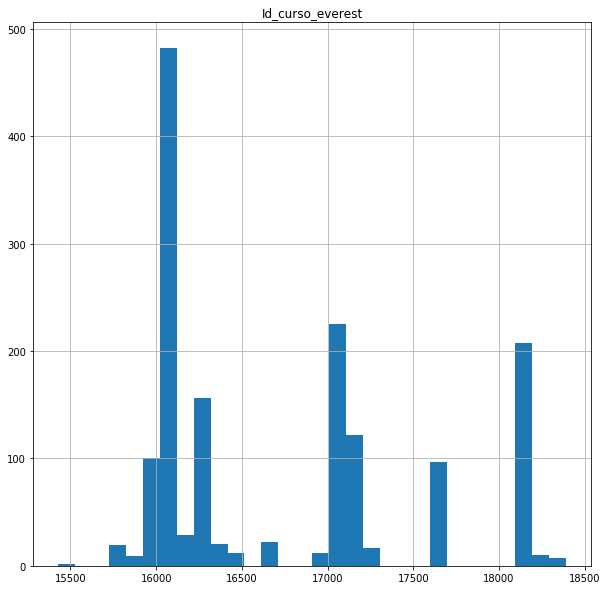

In [5]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=data[column], columns='% observations', normalize='columns'))

# Histograms for each numeric features
display(data.describe())
%matplotlib inline
hist = data.hist(bins=30, sharey=True, figsize=(10, 10))

Status,C,P
Country,,
Chile,0.061158,0.0
Colombia,0.031880,0.0
Mexico,0.906962,1.0


Status,C,P
nombre,,
Demetrio Carlos Flores Flores,0.000651,0.0
ALONSO NUÑEZ FUENTES,0.000651,0.0
ANDRES SILVA PIZARRO,0.000651,0.0
AURORA MORON GOMEZ,0.000651,0.0
Aaron Alarcon,0.000651,0.0
Abel Obando Florian,0.000651,0.0
Adolfo Pérez Silva,0.000651,0.0
Adolfo Pardo,0.000651,0.0
Adrian Mu,0.000651,0.0


Status,C,P
mail,,
84926303.mg@gmail.com,0.000651,0.0
A.NEZFUENTES@GMAIL.COM,0.000651,0.0
Aguerrero@cyc.cl,0.001301,0.0
Alexis.loyola@me.com,0.000651,0.0
Andreshmontoya@gmail.com,0.000651,0.0
Anmare01@gmail.com,0.000651,0.0
Anmarsoto@gmail.com,0.000651,0.0
CARLOS.ALVAREZ@VTR.CL,0.001952,0.0
CORDENES81@GMAIL.COM,0.000651,0.0


Status,C,P
company,,
-,0.004821,0.0
.,0.006887,0.0
0,0.001377,0.0
23People,0.001377,0.0
23ky corp,0.000689,0.0
29703176,0.001377,0.0
2brains,0.001377,0.0
3it,0.000689,0.0
56989229846,0.000689,0.0


Status,C,P
job,,
Director de Calidad,0.005344,0.0
*AUDITOR TI,0.000668,0.0
*Analista,0.002004,0.0
*Independiente,0.000668,0.0
-,0.001336,0.0
.,0.001336,0.0
Academico,0.000668,0.0
Administrador de Plataforma Microsoft,0.000668,0.0
Administrador de infraestructura,0.000668,0.0


Status,C,P
source,,
FaceBook,0.190631,0.000000
Facebook,0.033182,0.000000
Linkedin,0.012362,0.000000
adwords,0.200390,0.272727
mailing,0.010410,0.090909
web_calendar,0.238126,0.454545
web_everest,0.000651,0.000000
web_institute,0.314249,0.181818


Status,C,P
Name,,
Foundations of Enterprise Architecture using TOGAF v9.1,0.001301,0.000000
AWS Essentials,0.003253,0.000000
AWS Essentials-Online,0.027326,0.000000
Accelerated PMP Exam Prep Course,0.044893,0.000000
Advanced Architecting on Amazon Web Services,0.000651,0.000000
Agile Expert Certified,0.055953,0.000000
Agile Master Certified,0.016916,0.000000
Architecting on AWS-Online,0.027326,0.000000
BOUNDLE: Foundations + Applying Enterprise Architecture Using TOGAF V9.1,0.026675,0.000000


Status,C,P
CourseCode,,
AMC,0.016916,0.000000
AWS-ON,0.037085,0.000000
AWSADV,0.000651,0.000000
AWSAR,0.000651,0.000000
AWSAR-ON,0.016916,0.000000
AWSES,0.003253,0.000000
BAF,0.001301,0.000000
BDF,0.015615,0.000000
BDF-LOL,0.016265,0.000000


Id_curso_everest


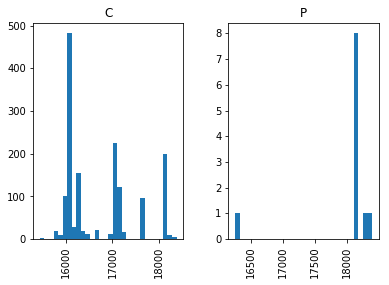

In [6]:
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Status':
        display(pd.crosstab(index=data[column], columns=data['Status'], normalize='columns'))

for column in data.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = data[[column, 'Status']].hist(by='Status', bins=30)
    plt.show()

,Id_curso_everest
Id_curso_everest,1.0


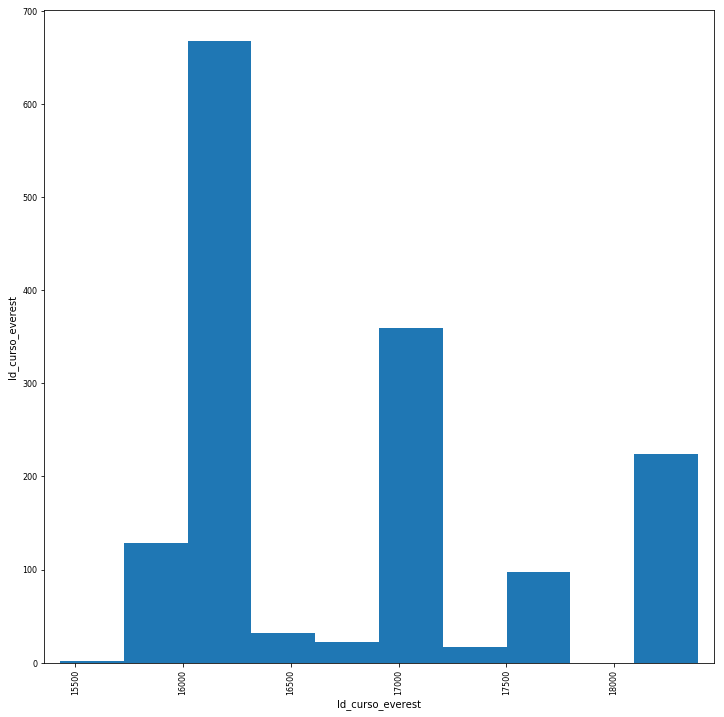

In [7]:
display(data.corr())
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.show()

In [8]:
data['no_previous_contact'] = np.where(data['Id_curso_everest'] == 0, 1, 0)

In [10]:
model_datax = data.drop(['nombre', 'mail', 'job', 'source'], axis=1)
display(model_datax)

,Country,company,Id_curso_everest,Status,Name,CourseCode,no_previous_contact
0,Chile,ninguna,15430,C,Scrum Master Certified,SPOCE,0
1,Chile,Bci,15430,C,Scrum Master Certified,SPOCE,0
2,Chile,.,15823,C,Scrum Master Certified,SPOCE,0
3,Chile,Trends,15823,C,Scrum Master Certified,SPOCE,0
4,Chile,particular,15823,C,Scrum Master Certified,SPOCE,0
5,Chile,Particular,15823,C,Scrum Master Certified,SPOCE,0
6,Chile,Personal,15823,C,Scrum Master Certified,SPOCE,0
7,Chile,particular,15823,C,Scrum Master Certified,SPOCE,0
8,Chile,Itau,15823,C,Scrum Master Certified,SPOCE,0
9,Mexico,acg-it,15859,C,Information Technology Infrastructure Library ...,IFUN_ES,0


In [12]:
model_data = pd.get_dummies(model_datax)
display(model_data)

,Id_curso_everest,no_previous_contact,Country_Chile,Country_Colombia,Country_Mexico,company_-,company_.,company_0,company_23People,company_23ky corp,company_29703176,company_2brains,company_3it,company_56989229846,company_5WI,company_976190732,company_997452759,company_A Port Operaciones S.A.,company_ACL,company_ACL Ingeniería y Construcción Ltda.,company_ADEC Industrial,company_ADM Software,company_AFP Cuprum,company_AFP Provida,company_ALAYA,company_ALISERVICE,company_ALPHA TECNOLOGIA Y SERVICIOS SPA,company_AR-ES IT Ltda.,company_ARQ-IT,company_ATENDEDOR,company_Aaa,company_Abastible,company_Academia Bailalo,company_Accenture,company_Accenture Chile,company_Acepta,company_Acme,company_Activenetwork,company_Adessa,company_Adessa Falabella,company_Adexus,company_Adexus S.A.,company_Adm Planning Ltda,company_Administrador NT,company_Admintour,company_Advisorit,company_Afex,company_Aguas Andinas,company_Aguayo Spa,company_Alaya,company_Albanetwork,company_Alejandro Echeverría Rocha,company_Alfapeople,company_Aligare,company_Altiuz,company_Alumno Ayudante,company_Analista,company_Analogica,company_Andacor SA,company_Andes Operaciones y Servicios,company_Anida Consultores,company_Answers & Solutions,company_ApertaTI Consulting,company_Arkano,company_Arquen Agile Branding,company_Arzobispado de Santiago,company_Atay Construcci,company_Atcom,company_Atento Chile,company_Atlas Copco Chilena S.A.C,company_Atlas Copco Chilena S.A.C.,company_AtlasCopco,company_Axiovista S.A.,company_Axity,company_Azurian,company_BA,company_BANCO ESTADO,company_BANCOESTADO,company_BBVA,company_BC Tecnologías,company_BCH,company_BCI,company_BCI Seguros Generales S.A.,company_BCI- particular,company_BHP,company_BIsys,company_BPLATAM,company_BS2,company_Back Office sistemas par,company_Bailac,company_Banca,company_Banco,company_Banco BBVA,company_Banco BICE,company_Banco Bci,company_Banco Central de Chile,company_Banco Chile,company_Banco Estado,company_Banco Estado Microempresas,company_Banco Falabella,company_Banco Internacional,company_Banco Itaú,company_Banco Santander,company_Banco Security,company_Banco de Chile,company_Banco del Estado de Chile,company_BancoEstado,company_BancoEstado Contacto 24 horas,company_BancoEstado Microempresas,company_Bastronic,company_Bbva,company_Bci,company_Beacon42,company_Beco,company_Becton Dickinson,company_Beiersdorf S.A.,company_Biometrika,company_Bitumix,company_Blauwekarper,company_Bluu,company_Bodega encargado recepcion,company_Booking.com,company_Booz,company_Bpex,company_Bureau Veritas,company_CA Technologies,company_CAM Chile,company_CAMARA DE COMERCIO DE SANTIAGO,company_CAP Mineria,company_CAPREDENA,company_CAT,company_CB HUNTING,company_CCAF 18 de Septiembre,company_CENCOSUD,company_CEO Fundador,company_CEVA,company_CHUBB,company_CIISA,company_CITIBANK,company_CMR,company_CMVM,company_COASIN,company_COMERCIAL FSC CHILE,company_CONICYT,company_COPEC,company_Caja Los Andes,company_Caja los Andes,company_Canal Cero,company_Capitaria,company_Capual,company_Cardumen Latam,company_Carenado,company_CasaIdeas,company_Cc,company_Cencosud,company_Cencosud,company_Central Madeirense,company_Cettic.cl,company_Cge,company_Chilecop Holding Group,company_Ciclo2 SpA,company_Ciren,company_Citigroup chile,company_Claro,company_Claro chile,company_Clicknet Chile Ltda,company_Client manager,company_Clip Tecnología,company_Club de la república,company_Clínica Alemana,company_Clínica Alemana de Santiago,company_Clínica Santa María,company_Coasin,company_Coca-Cola Embonor S.A.,company_Codelco,company_Colabra,company_Colegium,company_Comdata,company_Comder,company_Comercial Madison,company_Comercializadora Los Robles,company_Compañía de Seguros Confuturo S.A.,company_Complejo Hospitalario San José,company_Compusale,company_Computacion y comunicaciones,company_Conavicoop,company_Consorcio,company_Constructora W,company_Constructora valcar,company_Consulti,company_Consultor Independiente,company_Consultor independiente,company_Consu

In [13]:
train_data, validation_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])

In [14]:
display(train_data)

,Id_curso_everest,no_previous_contact,Country_Chile,Country_Colombia,Country_Mexico,company_-,company_.,company_0,company_23People,company_23ky corp,company_29703176,company_2brains,company_3it,company_56989229846,company_5WI,company_976190732,company_997452759,company_A Port Operaciones S.A.,company_ACL,company_ACL Ingeniería y Construcción Ltda.,company_ADEC Industrial,company_ADM Software,company_AFP Cuprum,company_AFP Provida,company_ALAYA,company_ALISERVICE,company_ALPHA TECNOLOGIA Y SERVICIOS SPA,company_AR-ES IT Ltda.,company_ARQ-IT,company_ATENDEDOR,company_Aaa,company_Abastible,company_Academia Bailalo,company_Accenture,company_Accenture Chile,company_Acepta,company_Acme,company_Activenetwork,company_Adessa,company_Adessa Falabella,company_Adexus,company_Adexus S.A.,company_Adm Planning Ltda,company_Administrador NT,company_Admintour,company_Advisorit,company_Afex,company_Aguas Andinas,company_Aguayo Spa,company_Alaya,company_Albanetwork,company_Alejandro Echeverría Rocha,company_Alfapeople,company_Aligare,company_Altiuz,company_Alumno Ayudante,company_Analista,company_Analogica,company_Andacor SA,company_Andes Operaciones y Servicios,company_Anida Consultores,company_Answers & Solutions,company_ApertaTI Consulting,company_Arkano,company_Arquen Agile Branding,company_Arzobispado de Santiago,company_Atay Construcci,company_Atcom,company_Atento Chile,company_Atlas Copco Chilena S.A.C,company_Atlas Copco Chilena S.A.C.,company_AtlasCopco,company_Axiovista S.A.,company_Axity,company_Azurian,company_BA,company_BANCO ESTADO,company_BANCOESTADO,company_BBVA,company_BC Tecnologías,company_BCH,company_BCI,company_BCI Seguros Generales S.A.,company_BCI- particular,company_BHP,company_BIsys,company_BPLATAM,company_BS2,company_Back Office sistemas par,company_Bailac,company_Banca,company_Banco,company_Banco BBVA,company_Banco BICE,company_Banco Bci,company_Banco Central de Chile,company_Banco Chile,company_Banco Estado,company_Banco Estado Microempresas,company_Banco Falabella,company_Banco Internacional,company_Banco Itaú,company_Banco Santander,company_Banco Security,company_Banco de Chile,company_Banco del Estado de Chile,company_BancoEstado,company_BancoEstado Contacto 24 horas,company_BancoEstado Microempresas,company_Bastronic,company_Bbva,company_Bci,company_Beacon42,company_Beco,company_Becton Dickinson,company_Beiersdorf S.A.,company_Biometrika,company_Bitumix,company_Blauwekarper,company_Bluu,company_Bodega encargado recepcion,company_Booking.com,company_Booz,company_Bpex,company_Bureau Veritas,company_CA Technologies,company_CAM Chile,company_CAMARA DE COMERCIO DE SANTIAGO,company_CAP Mineria,company_CAPREDENA,company_CAT,company_CB HUNTING,company_CCAF 18 de Septiembre,company_CENCOSUD,company_CEO Fundador,company_CEVA,company_CHUBB,company_CIISA,company_CITIBANK,company_CMR,company_CMVM,company_COASIN,company_COMERCIAL FSC CHILE,company_CONICYT,company_COPEC,company_Caja Los Andes,company_Caja los Andes,company_Canal Cero,company_Capitaria,company_Capual,company_Cardumen Latam,company_Carenado,company_CasaIdeas,company_Cc,company_Cencosud,company_Cencosud,company_Central Madeirense,company_Cettic.cl,company_Cge,company_Chilecop Holding Group,company_Ciclo2 SpA,company_Ciren,company_Citigroup chile,company_Claro,company_Claro chile,company_Clicknet Chile Ltda,company_Client manager,company_Clip Tecnología,company_Club de la república,company_Clínica Alemana,company_Clínica Alemana de Santiago,company_Clínica Santa María,company_Coasin,company_Coca-Cola Embonor S.A.,company_Codelco,company_Colabra,company_Colegium,company_Comdata,company_Comder,company_Comercial Madison,company_Comercializadora Los Robles,company_Compañía de Seguros Confuturo S.A.,company_Complejo Hospitalario San José,company_Compusale,company_Computacion y comunicaciones,company_Conavicoop,company_Consorcio,company_Constructora W,company_Constructora valcar,company_Consulti,company_Consultor Independiente,company_Consultor independiente,company_Consu

In [15]:
pd.concat([train_data['Status_C'], train_data.drop(['Status_P', 'Status_C'], axis=1)], axis=1).to_csv('train.csv', index=False, header=False)

In [16]:
pd.concat([validation_data['Status_C'], validation_data.drop(['Status_P', 'Status_C'], axis=1)], axis=1).to_csv('validation.csv', index=False, header=False)

In [17]:
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')

In [18]:
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'xgboost')

	get_image_uri(region, 'xgboost', '0.90-1').


In [19]:
s3_input_train = sagemaker.s3_input(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')

In [20]:
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(container,
                                    role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

2019-11-15 08:46:11 Starting - Starting the training job...
2019-11-15 08:46:13 Starting - Launching requested ML instances......
2019-11-15 08:47:17 Starting - Preparing the instances for training......
2019-11-15 08:48:19 Downloading - Downloading input data...
2019-11-15 08:49:10 Training - Training image download completed. Training in progress..Arguments: train
[2019-11-15:08:49:11:INFO] Running standalone xgboost training.
[2019-11-15:08:49:11:INFO] File size need to be processed in the node: 2.48mb. Available memory size in the node: 8597.62mb
[2019-11-15:08:49:11:INFO] Determined delimiter of CSV input is ','
[08:49:11] S3DistributionType set as FullyReplicated
[08:49:11] 1083x930 matrix with 1007190 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2019-11-15:08:49:11:INFO] Determined delimiter of CSV input is ','
[08:49:11] S3DistributionType set as FullyReplicated
[08:49:11] 310x930 matrix with 288300 entries loaded from /opt/ml/input/data/v

In [21]:
xgb_predictor = xgb.deploy(initial_instance_count=1,
                           instance_type='ml.m4.xlarge')

--------------------------------------------------------------------------------------------------------------!

In [22]:
xgb_predictor.content_type = 'text/csv'
xgb_predictor.serializer = csv_serializer

In [23]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.drop(['Status_P', 'Status_C'], axis=1).as_matrix())

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [24]:
pd.crosstab(index=test_data['Id_curso_everest'], columns=np.round(predictions), rownames=['ID_Curso'], colnames=['Prediccion'])

Prediccion,1.0
ID_Curso,
15859,2
15928,3
15929,3
15930,1
15965,3
16039,5
16041,3
16044,2
16073,13


In [26]:
pred = pd.crosstab(index=test_data['Id_curso_everest'], columns=np.round(predictions), rownames=['ID_Curso'], colnames=['Prediccion'])
pred.to_csv('prediccion.csv')

In [29]:
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'prediccion/prediccion.csv')).upload_file('prediccion.csv')